# Assignment 2 - Milka Perez

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt # Useful for plotting
from numpy import linalg as LA # Useful for calling linear algebra functions
import time # for timing code execution
import pandas as pd
import scipy as sp

## Question 3

## Part b: Implementation

In [2]:
def forwardsub(A,b):
    n = b.size
    x = np.zeros(n)
    x[0] = b[0]/A[0,0]
    
    for i in np.arange(1,n):
        foo = 0
        for j in np.arange(0,i):
            foo = foo + A[[i],[j]]*x[j]
        x[i] = (b[i] - foo) /A[i,i]
    return x

In [3]:
def tridiagA(n):
    A = sp.sparse.diags([np.ones(n-1)*(-1),np.ones(n)*(2),  np.ones(n-1)*(-1)], [-1, 0, 1])    
    A = sp.sparse.csr_array(A).multiply((n+1)**2)  #multiply by 1/h^2
    return A

#### Richardson

In [4]:
def Richardson(A, b, w, x0, tol, maxIter):
    n = b.size
    x = np.zeros((maxIter, n))
    x[0,:] = x0
    r = b - (A@x[0,:])
    i = 1
    
    while LA.norm(r) > tol and i < maxIter:
        x[i,:] = x[i-1,:] + w*r
        r = b - A@x[i, :]
        i += 1
    return x,i

#### Optimal Richardson

#### Jacobi

In [5]:
def Jacobi(A, b, x0, tol, maxIter):
    n = b.size
    d = A.diagonal()
    Dinv = 1./d
    D = sp.sparse.diags_array(d,offsets = 0)
    Dinv = sp.sparse.diags_array(Dinv,offsets = 0)
    N = A-D

    x = np.zeros((maxIter, n))

    x[0,:] = x0
    r = b - (A@x[0,:])
    i = 1
    
    while LA.norm(r) > tol and i < maxIter:
        x[i,:] = Dinv @(b - (N @ x[i-1, :]))
        r = b - (A@x[i, :])
        i += 1
    return x,i
    

#### Gauss Seidel

In [6]:
def Gauss(A, b, x0, tol, maxIter):
    n = b.size
    LD = sp.sparse.tril(A).tocsr()
    U = A - LD
    x = np.zeros((maxIter, n))

    x[0,:] = x0
    r = b - (U@x[0,:])
    i = 1 
    while LA.norm(r) > tol and i < maxIter:
        x[i,:] = forwardsub(LD,b-U@x[i-1, :])
        r = b - A@x[i,:]
        i += 1
        
    return x, i

#### S.O.R.

In [7]:
def SOR(A, b, x0, theta, tol, maxIter):
    n = b.size
    LD = sp.sparse.tril(A).tocsr()
    U = A - LD
    x = np.zeros((maxIter, n))

    x[0,:] = x0
    r = b - (U@x[0,:])
    i = 1 
    while LA.norm(r) > tol and i < maxIter:
        x[i,:] = forwardsub(LD,theta*(b-U@x[i-1,:])+(1-theta)*(LD@x[i-1,:]))
        r = b - A@x[i,:]
        i += 1
        
    return x, i

#### Optimal S.O.R.

Same as SOR but with an optimal theta. In this case I chose 1.55

#### Plotting the iterations on a log scale

The L-2 Norm of the residual after 1574 Richardson interactions is 9.607118501968132e-15
The L-2 Norm of the residual after 5000 Optimal Richardson interactions is 1.0841599276764049e-14
The L-2 Norm of the residual after 828 Jacobi interactions is 8.565282493038633e-15
The L-2 Norm of the residual after 407 Gauss Seidel interactions is 8.926082647349967e-15


/tmp/ipykernel_222942/4289074210.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = (b[i] - foo) /A[i,i]


The L-2 Norm of the residual after 336 Gauss Seidel interactions is 9.769962616701378e-15
The L-2 Norm of the residual after 259 Gauss Seidel interactions is 9.230220894641107e-15


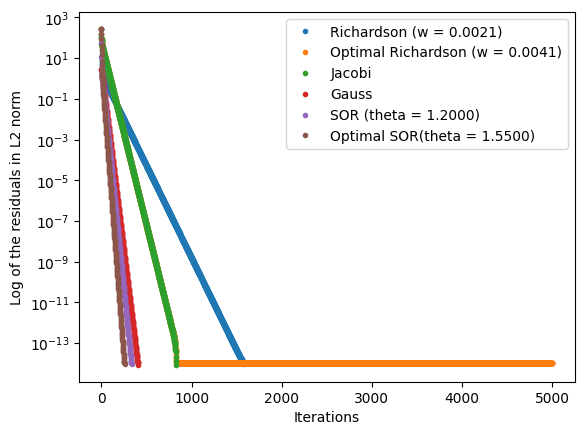

In [8]:
n = 10
tol = 1e-14
maxIter = 5000
b = np.ones(n)
x0 = np.append(1,np.zeros(n-1))
A = tridiagA(n)

eMax = 2*(n+1)**2*(1 - np.cos(n*np.pi/( n+1 ) ) )
eMin = 2*(n+1)**2*(1 - np.cos(np.pi/( n+1 ) ) )
w = 1/eMax

# Richardson Method

xRich, iRich = Richardson(A,b, w, x0, tol, maxIter)
print('The L-2 Norm of the residual after', iRich, 'Richardson interactions is', LA.norm(b - A@xRich[iRich-1, :]))

resNormRich = np.zeros(iRich)
for j in range(0,iRich):
    resNormRich[j] = LA.norm(b - A@xRich[j,:])
# Optimal Richardson

wOpt = 2 / (eMax + eMin)
xOptRich, iOptRich = Richardson(A,b, wOpt, x0, tol, maxIter)
print('The L-2 Norm of the residual after', iOptRich, 'Optimal Richardson interactions is', LA.norm(b - A@xOptRich[iOptRich-1, :]))

resNormOptRich = np.zeros(iOptRich)
for j in range(0,iOptRich):
    resNormOptRich[j] = LA.norm(b - A@xOptRich[j,:])

# Jacobian
xJac, iJac = Jacobi(A,b,x0, tol, maxIter)
print('The L-2 Norm of the residual after', iJac, 'Jacobi interactions is', LA.norm(b - A@xJac[iJac-1, :]))

resNormJac = np.zeros(iJac)
for j in range(0,iJac):
    resNormJac[j] = LA.norm(b - A@xJac[j,:])

# Gauss Seidel

xGaus, iGaus = Gauss(A,b,x0, tol, maxIter)
print('The L-2 Norm of the residual after', iGaus, 'Gauss Seidel interactions is', LA.norm(b - A@xGaus[iGaus-1, :]))

resNormGaus = np.zeros(iGaus)
for j in range(0,iGaus):
    resNormGaus[j] = LA.norm(b - A@xGaus[j,:])

# SOR
theta= 1.2
xSOR, iSOR = SOR(A,b,x0,theta, tol, maxIter)
print('The L-2 Norm of the residual after', iSOR, 'Gauss Seidel interactions is', LA.norm(b - A@xSOR[iSOR-1, :]))

resNormSOR = np.zeros(iSOR)
for j in range(0,iSOR):
    resNormSOR[j] = LA.norm(b - A@xSOR[j,:])

# Optimal SOR
thetaopt = 1.55
xoptSOR, ioptSOR = SOR(A,b,x0,thetaopt, tol, maxIter)
print('The L-2 Norm of the residual after', ioptSOR, 'Gauss Seidel interactions is', LA.norm(b - A@xoptSOR[ioptSOR-1, :]))

resNormoptSOR = np.zeros(ioptSOR)
for j in range(0,ioptSOR):
    resNormoptSOR[j] = LA.norm(b - A@xoptSOR[j,:])

plt.xlabel("Iterations")
plt.ylabel("Log of the residuals in L2 norm")
plt.plot(np.linspace(0,iRich-1, iRich), resNormRich, '.', label = f"Richardson (w = {w:,.4f})")
plt.plot(np.linspace(0,iOptRich-1, iOptRich), resNormOptRich, '.',  label = f"Optimal Richardson (w = {wOpt:,.4f})")
plt.plot(np.linspace(0,iJac-1, iJac), resNormJac, '.', label = f"Jacobi")
plt.plot(np.linspace(0,iGaus-1, iGaus), resNormGaus, '.', label = f"Gauss")
plt.plot(np.linspace(0,iSOR-1, iSOR), resNormSOR, '.', label = f"SOR (theta = {theta:,.4f})")
plt.plot(np.linspace(0,ioptSOR-1, ioptSOR), resNormoptSOR, '.', label = f"Optimal SOR(theta = {thetaopt:,.4f})")

plt.yscale("log")
plt.legend(loc = "upper right")
plt.show()

The L-2 Norm of the residual after 50 Richardson interactions is 3639.0037075534947
The L-2 Norm of the residual after 50 Optimal Richardson interactions is 112802.99418654667
The L-2 Norm of the residual after 50 Jacobi interactions is 112802.9941865468


/tmp/ipykernel_222942/4289074210.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = (b[i] - foo) /A[i,i]


The L-2 Norm of the residual after 50 Gauss Seidel interactions is 31.28456583907911
The L-2 Norm of the residual after 50 Gauss Seidel interactions is 31.250302596151258
The L-2 Norm of the residual after 50 Gauss Seidel interactions is 31.815176380475943


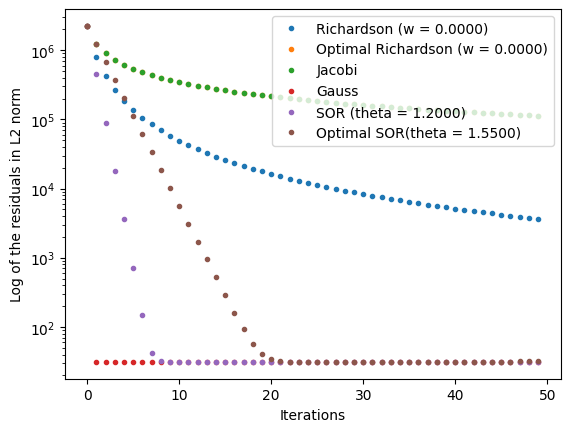

In [51]:
n = 1000
tol = 1e-14
maxIter = 50
b = np.ones(n)
x0 = np.append(1,np.zeros(n-1))
A = tridiagA(n)

eMax = 2*(n+1)**2*(1 - np.cos(n*np.pi/( n+1 ) ) )
eMin = 2*(n+1)**2*(1 - np.cos(np.pi/( n+1 ) ) )
w = 1/eMax

xRich, iRich = Richardson(A,b, w, x0, tol, maxIter)
print('The L-2 Norm of the residual after', iRich, 'Richardson interactions is', LA.norm(b - A@xRich[iRich-1, :]))


resNormRich = np.zeros(iRich)
for j in range(0,iRich):
    resNormRich[j] = LA.norm(b - A@xRich[j,:])


wOpt = 2 / (eMax + eMin)
xOptRich, iOptRich = Richardson(A,b, wOpt, x0, tol, maxIter)
print('The L-2 Norm of the residual after', iOptRich, 'Optimal Richardson interactions is', LA.norm(b - A@xOptRich[iOptRich-1, :]))

resNormOptRich = np.zeros(iOptRich)
for j in range(0,iOptRich):
    resNormOptRich[j] = LA.norm(b - A@xOptRich[j,:])

xJac, iJac = Jacobi(A,b,x0, tol, maxIter)
print('The L-2 Norm of the residual after', iJac, 'Jacobi interactions is', LA.norm(b - A@xJac[iJac-1, :]))

resNormJac = np.zeros(iJac)
for j in range(0,iJac):
    resNormJac[j] = LA.norm(b - A@xJac[j,:])


xGaus, iGaus = Gauss(A,b,x0, tol, maxIter)
print('The L-2 Norm of the residual after', iGaus, 'Gauss Seidel interactions is', LA.norm(b - A@xGaus[iGaus-1, :]))

resNormGaus = np.zeros(iGaus)
for j in range(0,iGaus):
    resNormGaus[j] = LA.norm(b - A@xGaus[j,:])

theta= 1.2
xSOR, iSOR = SOR(A,b,x0,theta, tol, maxIter)
print('The L-2 Norm of the residual after', iSOR, 'Gauss Seidel interactions is', LA.norm(b - A@xSOR[iSOR-1, :]))

resNormSOR = np.zeros(iSOR)
for j in range(0,iSOR):
    resNormSOR[j] = LA.norm(b - A@xSOR[j,:])

thetaopt = 1.55
xoptSOR, ioptSOR = SOR(A,b,x0,thetaopt, tol, maxIter)
print('The L-2 Norm of the residual after', ioptSOR, 'Gauss Seidel interactions is', LA.norm(b - A@xoptSOR[ioptSOR-1, :]))

resNormoptSOR = np.zeros(ioptSOR)
for j in range(0,ioptSOR):
    resNormoptSOR[j] = LA.norm(b - A@xoptSOR[j,:])


plt.xlabel("Iterations")
plt.ylabel("Log of the residuals in L2 norm")
plt.plot(np.linspace(0,iRich-1, iRich), resNormRich, '.', label = f"Richardson (w = {w:,.4f})")
plt.plot(np.linspace(0,iOptRich-1, iOptRich), resNormOptRich, '.',  label = f"Optimal Richardson (w = {wOpt:,.4f})")
plt.plot(np.linspace(0,iJac-1, iJac), resNormJac, '.', label = f"Jacobi")
plt.plot(np.linspace(0,iGaus-1, iGaus), resNormGaus, '.', label = f"Gauss")
plt.plot(np.linspace(0,iSOR-1, iSOR), resNormSOR, '.', label = f"SOR (theta = {theta:,.4f})")
plt.plot(np.linspace(0,ioptSOR-1, ioptSOR), resNormoptSOR, '.', label = f"Optimal SOR(theta = {thetaopt:,.4f})")

plt.yscale("log")
plt.legend(loc = "upper right")
plt.show()

#### Steepest Descent

In [13]:
def SD(A, b, x0, tol, maxIter):
    n = b.size
    x = np.zeros((maxIter, n))
    x[0,:] = x0
    r = b - A @ x[0,:]
    i = 1
    while LA.norm(r)>tol and i<maxIter:
        x[i,:] = x[i-1,:] + (((r.T @ r) / (r.T @ A @ r)) * r)
        r = b - A @ x[i,:]
        i +=1
    return x,i

In [49]:
def CG(A, b, x0, tol, maxIter):
    n = b.size
    x = x0 
    # x[0,:] = x0
    r = b - A @ x
    s = r
    i = 1
    errors = [np.linalg.norm(b-A@x)]
    while LA.norm(r)>tol and i<maxIter:
        foo = A @ s
        goo = (r@r)/(s@foo)
        x = x + ((goo) * s)
        rk = r - (goo * foo)
        s = rk + ((rk@rk) / (r@r)) * s
        r = rk
        errors.append(np.linalg.norm(r))
        i += 1
    return x, errors


The L-2 Norm of the residual after 10000 Steepest Descent interactions is 38.347716017702105
The L-2 Norm of the residual after 1509 Conjugate Gradient interactions is 6.9686939202894825e-09


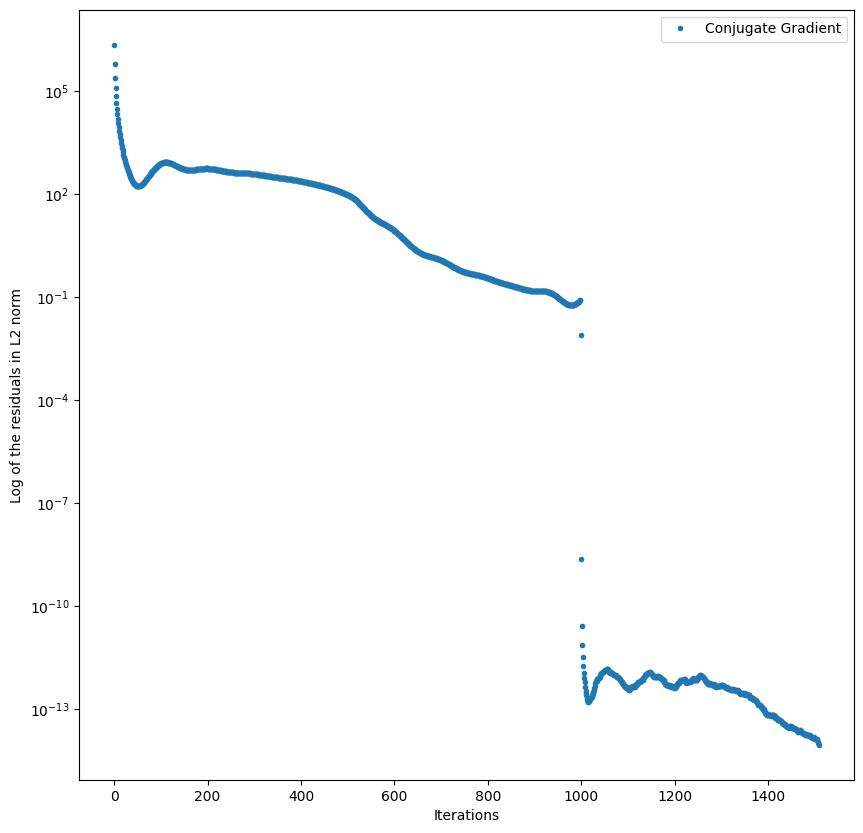

In [50]:
n = 1000
tol = 1e-14
maxIter = 10000
b = np.ones(n)
x0 = np.append(1,np.zeros(n-1))
A = tridiagA(n)

# Steepest Descent
xSD, iSD = SD(A, b, x0, tol, maxIter)
print('The L-2 Norm of the residual after', iSD, 'Steepest Descent interactions is', LA.norm(b - A@xSD[iSD-1, :]))

resNormSD = np.zeros(iSD)
for j in range(0,iSD):
    resNormSD[j] = LA.norm(b - A@xSD[j,:])

# Conjugate Gradient
xCG, iCG = CG(A,b,x0, tol, maxIter)
print('The L-2 Norm of the residual after',len(iCG) , 'Conjugate Gradient interactions is', LA.norm(b - A@xCG))

# resNormCG = np.zeros(iCG)
# for j in range(0,iCG):
#     resNormCG[j] = LA.norm(b - A@xCG[j,:])
plt.figure(figsize=(10,10))
plt.xlabel("Iterations")
plt.ylabel("Log of the residuals in L2 norm")
# plt.plot(np.linspace(0,iSD-1, iSD), resNormSD, '.', label = f"Steepest Descent")
plt.plot(iCG, '.',  label = f"Conjugate Gradient")

plt.yscale("log")
plt.legend(loc = "upper right")
plt.show()